# CALIFORNIA HOUSE PRICE PREDICTION

**About Dataset**

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Source: https://github.com/ageron/handson-ml2/tree/master/datasets/housing

**Import Libraries**

In [101]:
import warnings
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

%matplotlib inline

**Root path of data**

In [102]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'

**Read data**

In [103]:
df = pd.read_csv(DOWNLOAD_ROOT, sep=',')

In [104]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Info**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Check null values**

In [106]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Summarize numerical values**

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Frequency of categorical variable**

In [108]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Data visualization**

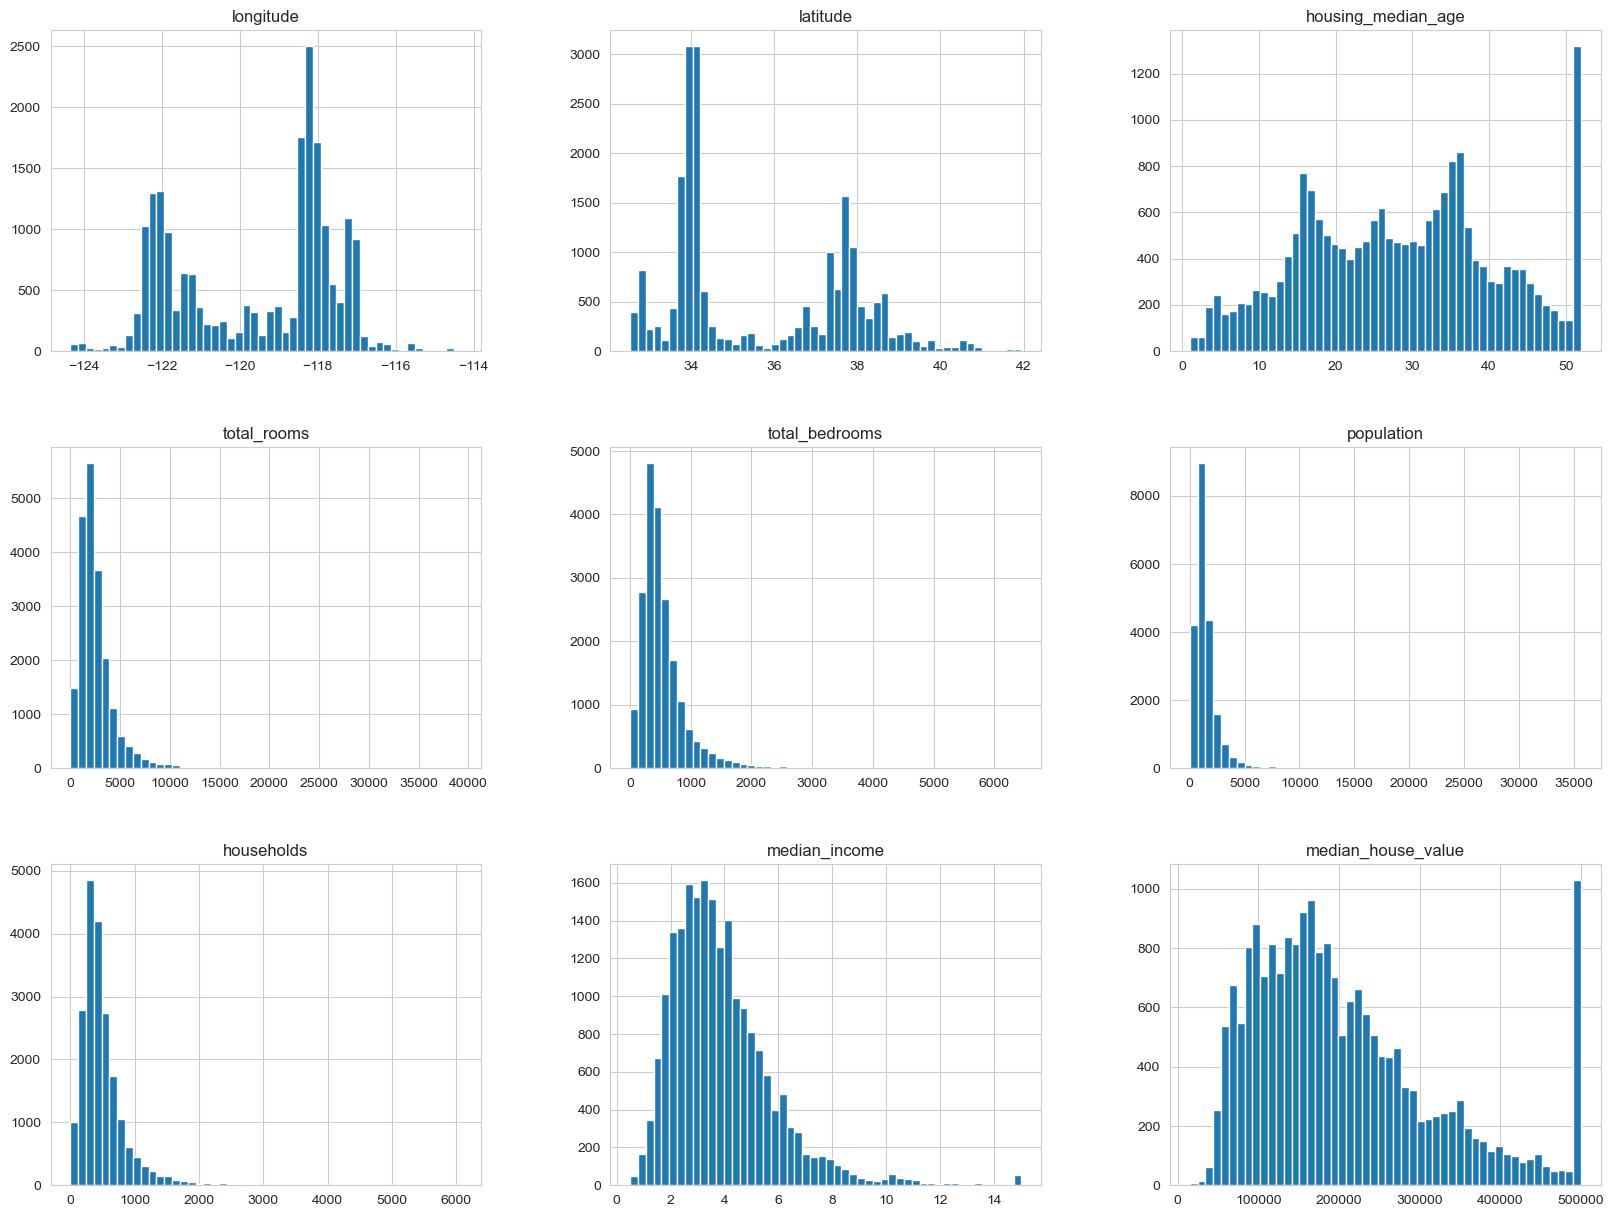

In [109]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

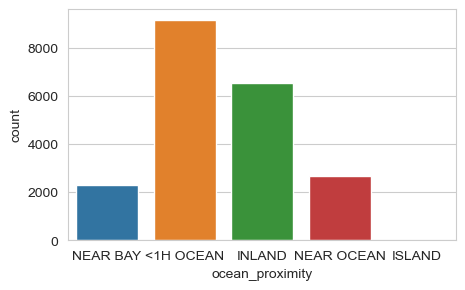

In [110]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='ocean_proximity')

**Visualizing Geographical Data**

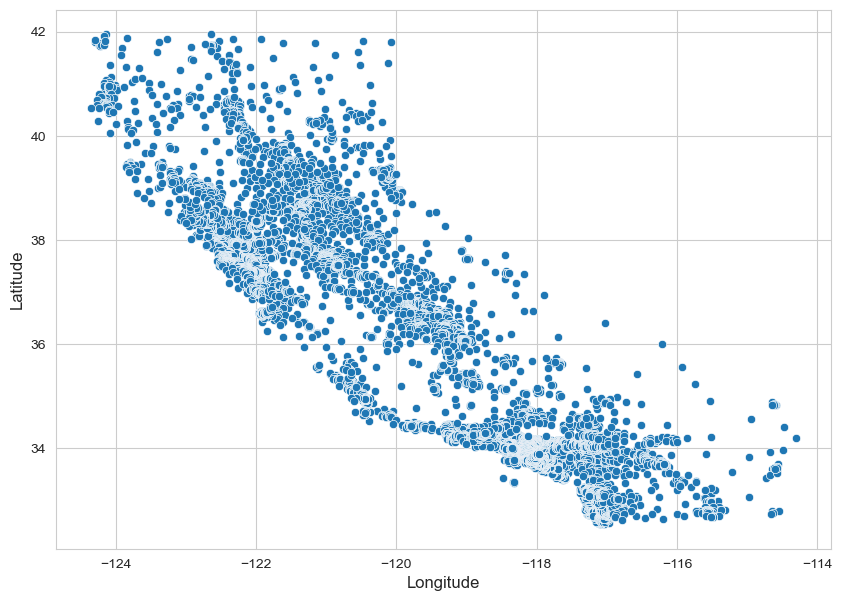

In [111]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='longitude', y='latitude')
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.show()

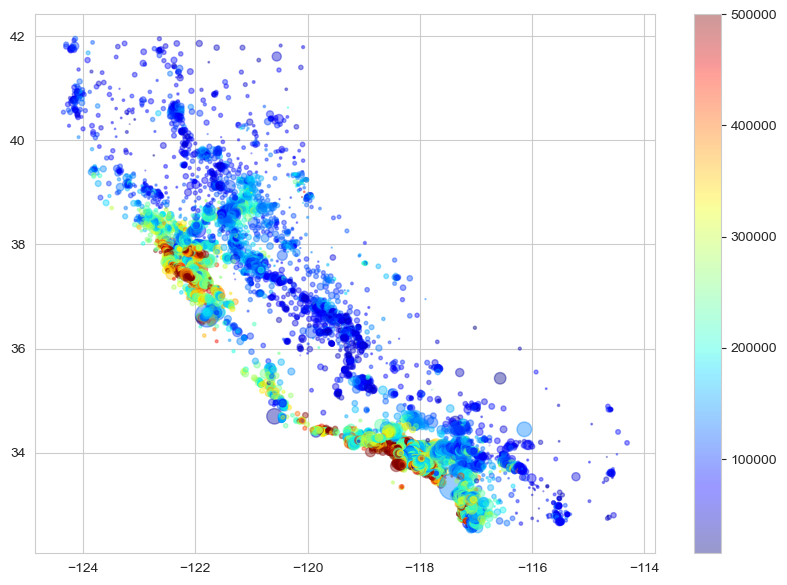

In [112]:
plt.figure(figsize=(10, 7))
points = plt.scatter(x='longitude', y='latitude', c='median_house_value', alpha=0.4,
                     s=df["population"]/100, label='population', data=df,
                     cmap=plt.get_cmap("jet")) #set style options

#add a color bar
plt.colorbar(points)
plt.show()

**Correlation**

In [113]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


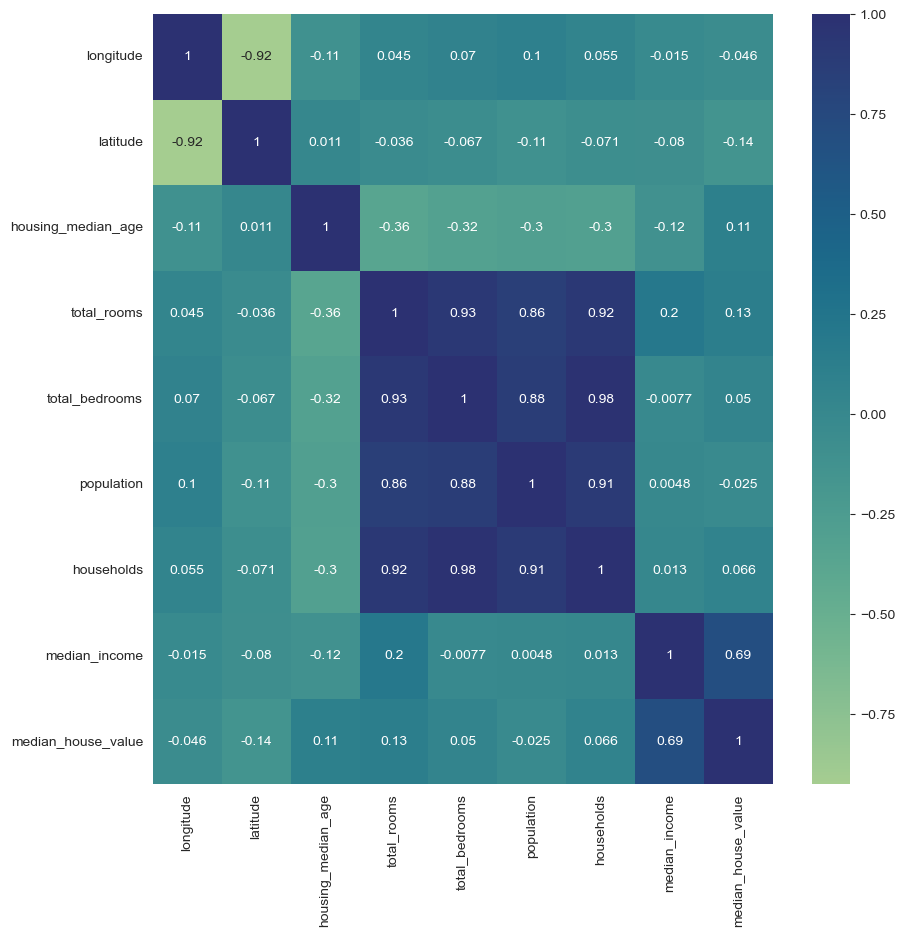

In [114]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.show()

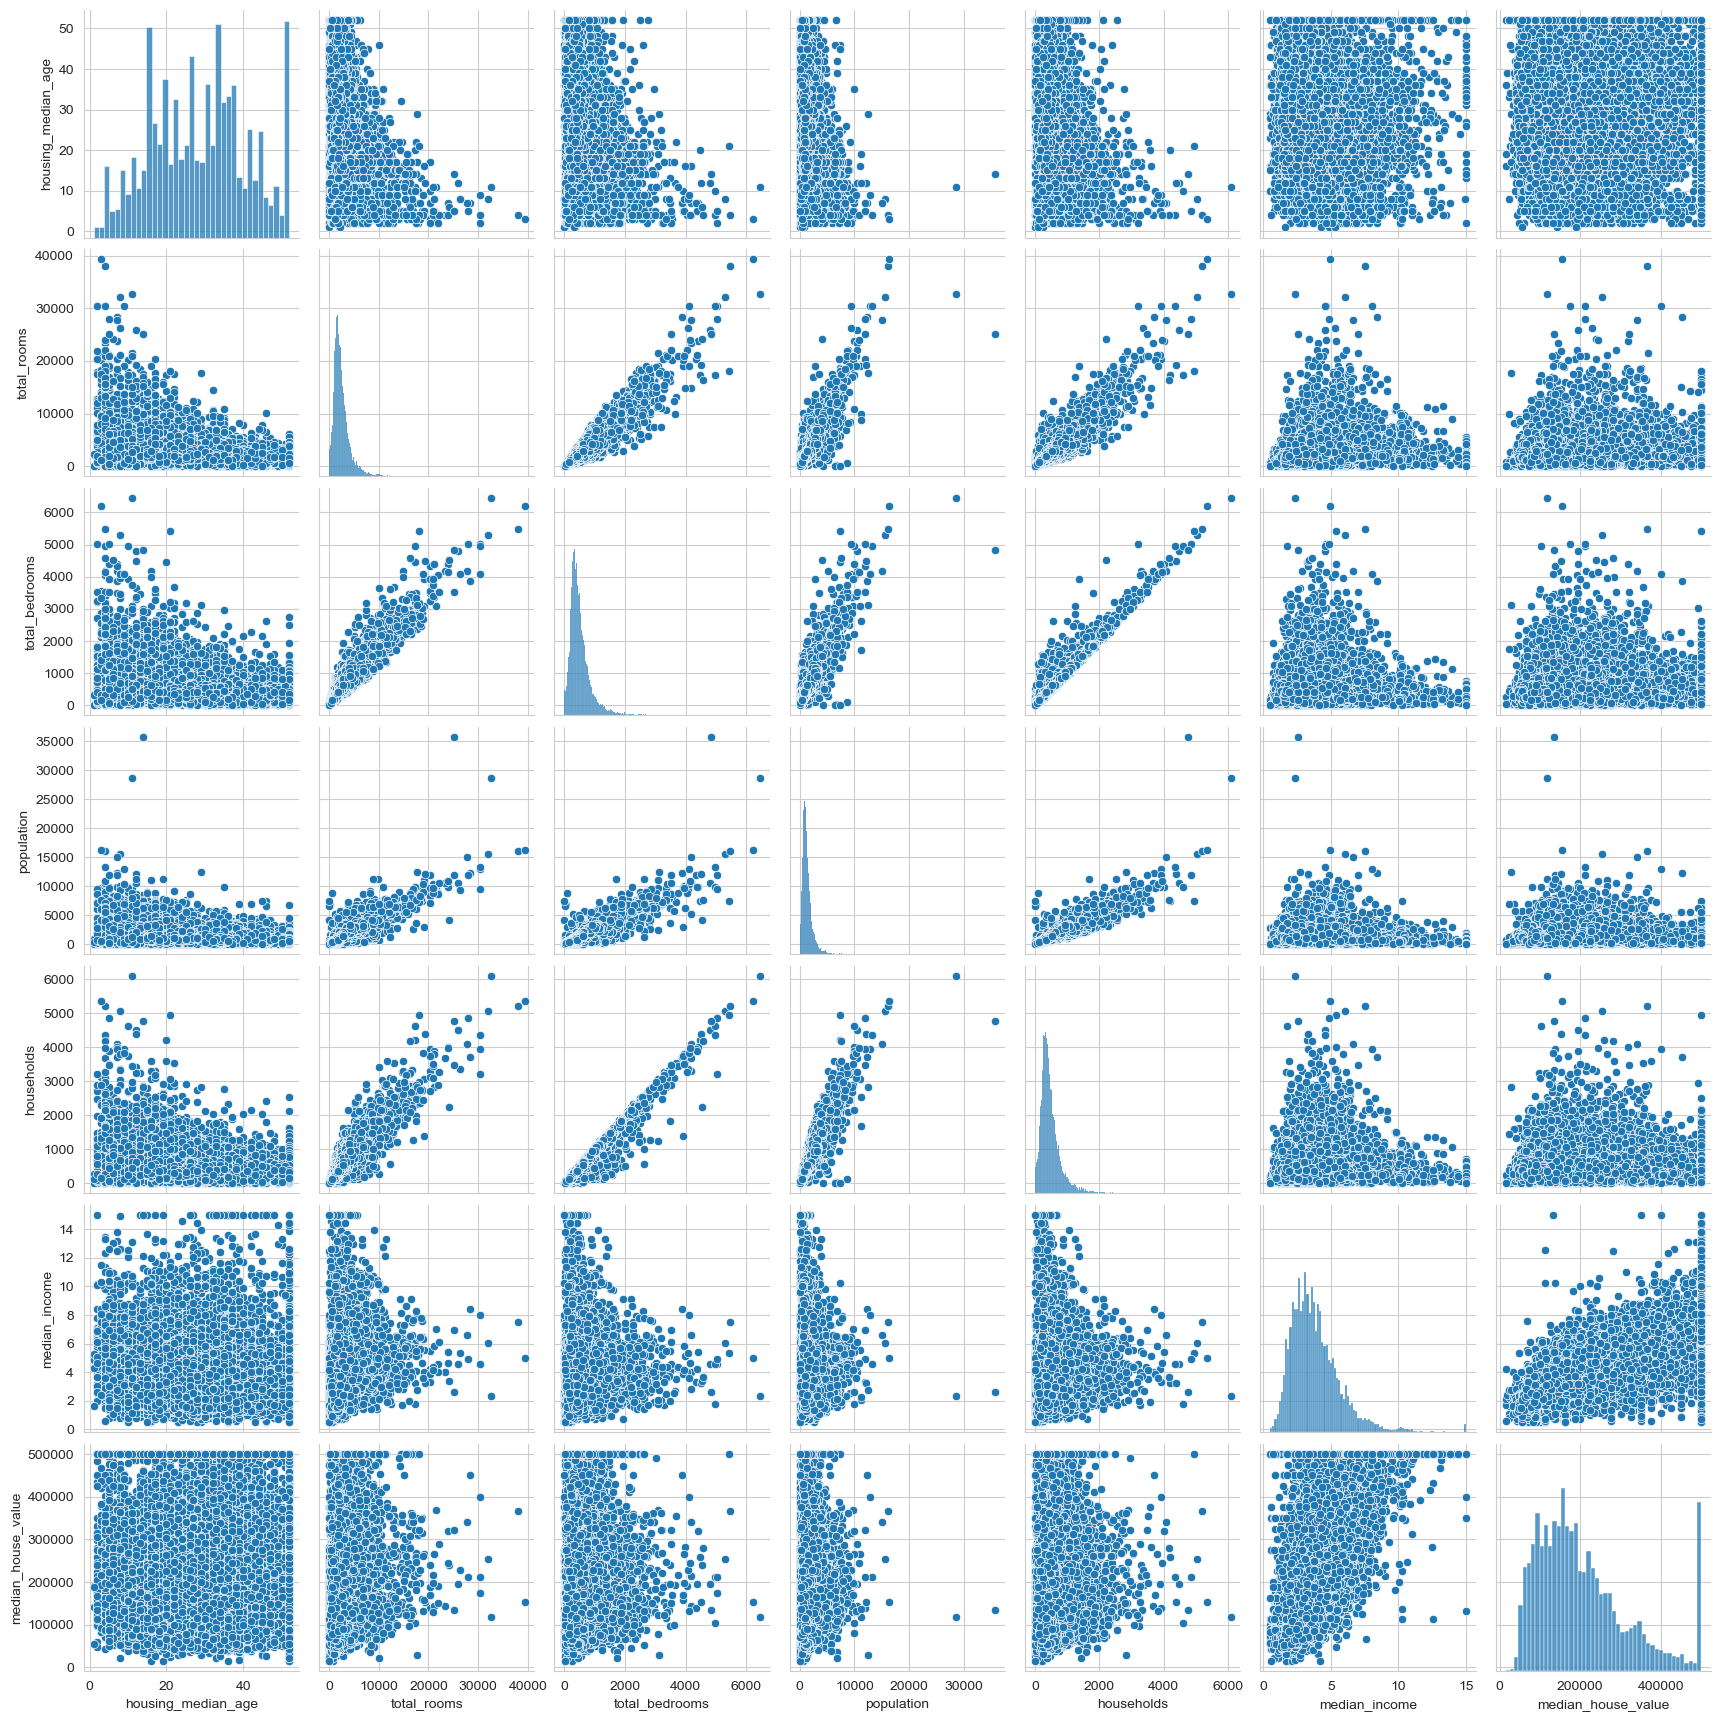

In [115]:
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income',
            'median_house_value']

sns.pairplot(df[features])
plt.show()

**Creating new features and check correlation matrix again**

In [116]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

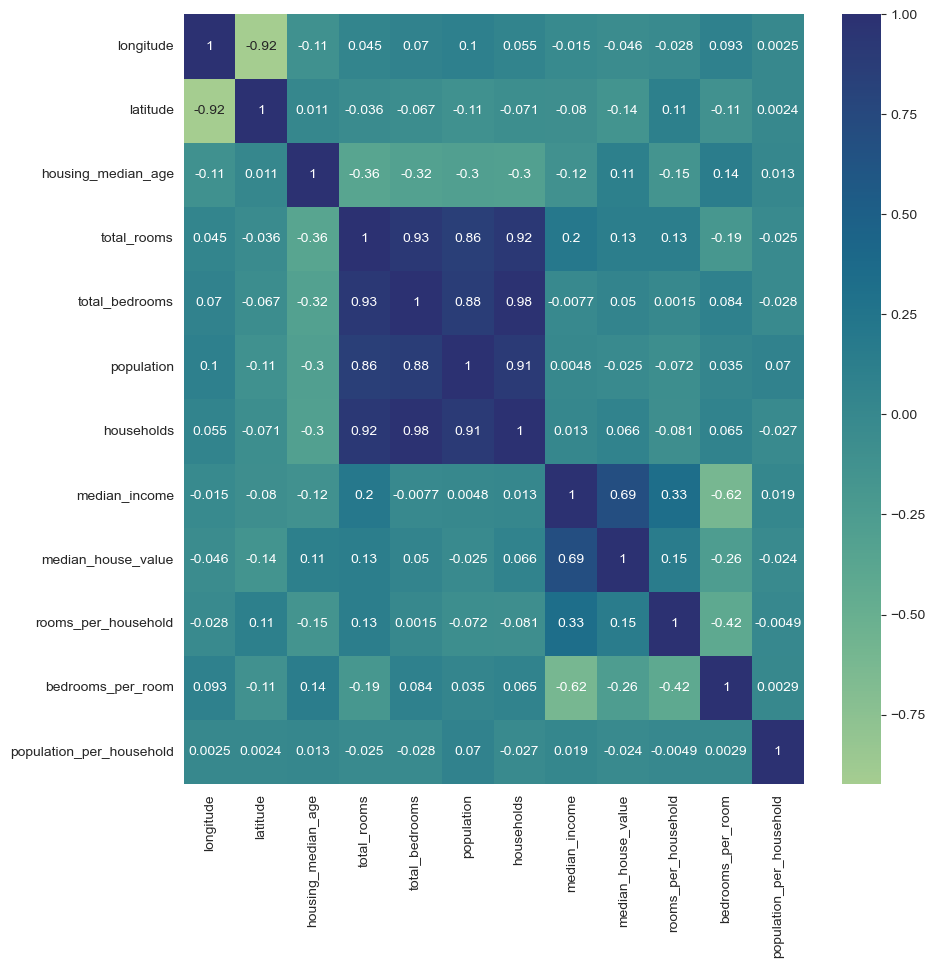

In [117]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.show()

**We will delete 'households' feature because there are many features highly correlated with 'households'**

In [118]:
df.drop('households', axis=1, inplace=True)

**We will also delete 'total_bedrooms' feature because this feature highly correlated with 'total_rooms'**

In [119]:
df.drop('total_bedrooms', axis=1, inplace=True)

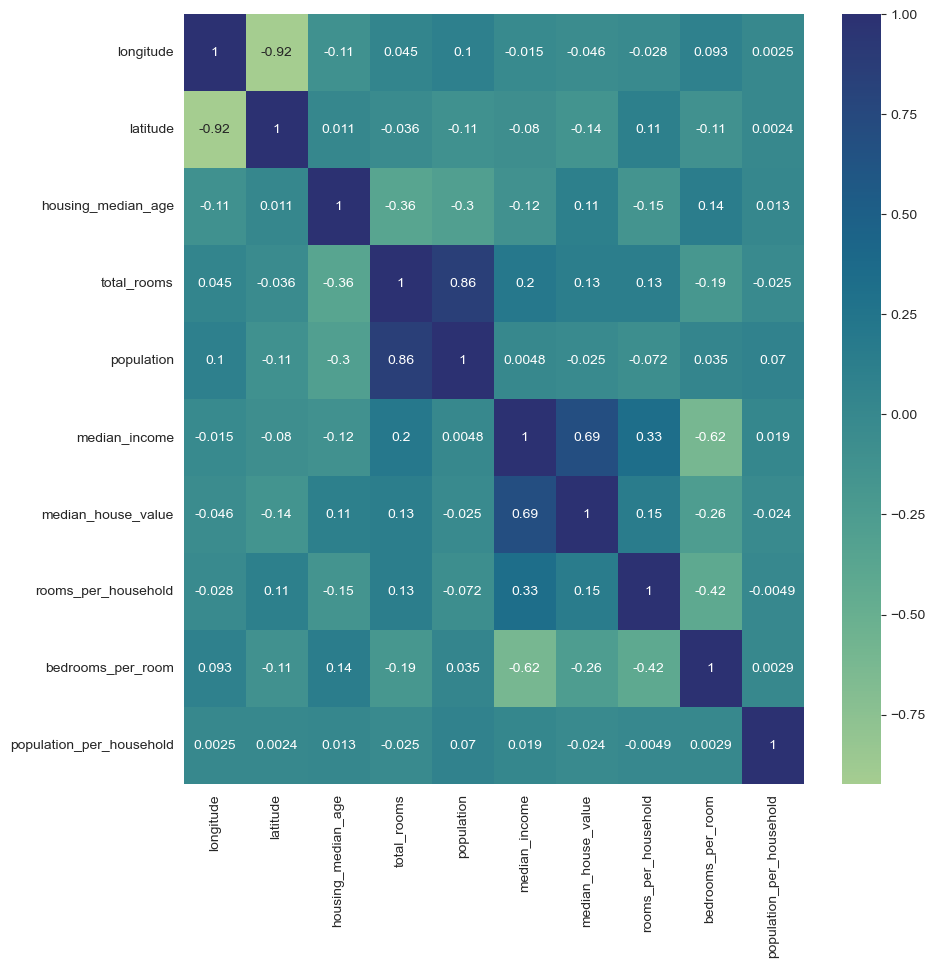

In [120]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.show()

## Catch categorical, numerical and cardinal variables

In [121]:
def grab_col_names(dataframe, cat_th=10, car_th=30):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car

In [122]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 20640
Variables: 11
Categorical Variables: 1
Numerical Variables: 10
Numerical But Categorical Variables: 0
Categorical But Cardinal: 0


In [123]:
cat_cols

['ocean_proximity']

In [124]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

## Data Preprocessing

**1-Data Cleaning**

In [125]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
population                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

**2-Outlier**

In [128]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

**Check Outliers**

In [129]:
outliers_list = []
for col in num_cols:
    print(col, f'-----There is outliers: {check_outlier(df, col, q1=0.05, q3=0.95)}')
    if check_outlier(df, col, q1=0.05, q3=0.95) == True:
        outliers_list.append(col)

longitude -----There is outliers: False
latitude -----There is outliers: False
housing_median_age -----There is outliers: False
total_rooms -----There is outliers: True
population -----There is outliers: True
median_income -----There is outliers: False
median_house_value -----There is outliers: False
rooms_per_household -----There is outliers: True
bedrooms_per_room -----There is outliers: True
population_per_household -----There is outliers: True


In [130]:
outliers_list

['total_rooms',
 'population',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

**Outliers thresholds**

In [131]:
for col in outliers_list:
    replace_with_thresholds(df, col)

**Check outliers again**

In [132]:
for col in num_cols:
    print(col, f'-----There is outliers: {check_outlier(df, col, q1=0.05, q3=0.95)}') 

longitude -----There is outliers: False
latitude -----There is outliers: False
housing_median_age -----There is outliers: False
total_rooms -----There is outliers: False
population -----There is outliers: False
median_income -----There is outliers: False
median_house_value -----There is outliers: False
rooms_per_household -----There is outliers: False
bedrooms_per_room -----There is outliers: False
population_per_household -----There is outliers: False


**3-One Hot Encoding**

In [134]:
def one_hot_encoder(dataframe, one_hot_cols, drop_first=True):
    
    dataframe = pd.get_dummies(dataframe, columns=one_hot_cols, drop_first=drop_first)
    
    return dataframe

In [135]:
one_hot_cols = [col for col in df.columns if  10 >= df[col].nunique() > 2]
one_hot_cols

['ocean_proximity']

In [138]:
df = one_hot_encoder(df, one_hot_cols)

In [139]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,1,0


**Now we will reassing the categorical, numerical and cardinal variables. Because we created new features with one hot encoding**

In [140]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 20433
Variables: 14
Categorical Variables: 4
Numerical Variables: 10
Numerical But Categorical Variables: 4
Categorical But Cardinal: 0


In [141]:
cat_cols

['ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [142]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

**4-Feature Scaling**

In [143]:
scaler = MinMaxScaler()

In [148]:
scaled_columns_name = df[num_cols].drop('median_house_value', axis=1).columns
scaled_columns_name

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [149]:
for col in scaled_columns_name:
    df[col] = scaler.fit_transform(df[[col]])

In [150]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.060106,0.041504,0.539668,452600.0,0.468234,0.100491,0.254100,0,0,1,0
1,0.212151,0.565356,0.392157,0.485846,0.311996,0.538027,358500.0,0.411326,0.120347,0.193316,0,0,1,0
2,0.210159,0.564293,1.000000,0.100291,0.064143,0.466028,352100.0,0.567710,0.063662,0.287744,0,0,1,0
3,0.209163,0.564293,1.000000,0.087079,0.072209,0.354699,341300.0,0.379227,0.182167,0.253062,0,0,1,0
4,0.209163,0.564293,1.000000,0.111244,0.073120,0.230776,342200.0,0.414661,0.155502,0.203084,0,0,1,0


## Linear Regression Model

In [151]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**RMSE Train set**

In [156]:
y_train_predictions = lin_reg.predict(X_train)
y_train_predictions

array([ 90463.78245317, 137109.15471032, 287802.19231967, ...,
       222224.60442857, 252451.30324061, 244046.68372267])

In [157]:
lin_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predictions))
lin_rmse_train

66495.83078681467

**RMSE Test set**

In [158]:
y_test_predictios = lin_reg.predict(X_test)
y_test_predictios

array([232147.94568653, 150206.55672597, 207005.82745253, ...,
       135495.79731587,  38404.13903771,  74657.6835923 ])

In [159]:
lin_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predictios))
lin_rmse_test

66182.09557119005

**Cross Validation for Linear Regression Model**

In [160]:
rmse_cross_val = np.mean(np.sqrt(-cross_val_score(lin_reg,
                X,
                y,
                scoring='neg_mean_squared_error',
                cv=10)))
rmse_cross_val

69867.03015930379

## Best Models

In [161]:
models = [
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())
        ]

In [162]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

RMSE: 93700.1413 (CART)
RMSE: 69519.4427 (RF)
RMSE: 66183.2173 (GBM)
RMSE: 65282.1475 (XGBoost)
RMSE: 62673.021 (LightGBM)


In [183]:
lgbm_model = LGBMRegressor().fit(X, y)

In [184]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [191]:
lgbm_params = {"learning_rate": [0.05, 0.1, 0.15],
                "n_estimators": [300, 500, 700]
              }

In [192]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [193]:
lgbm_gs_best.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [194]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)
final_model

LGBMRegressor(n_estimators=300)

In [195]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [196]:
rmse

62241.20786758831

In [199]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

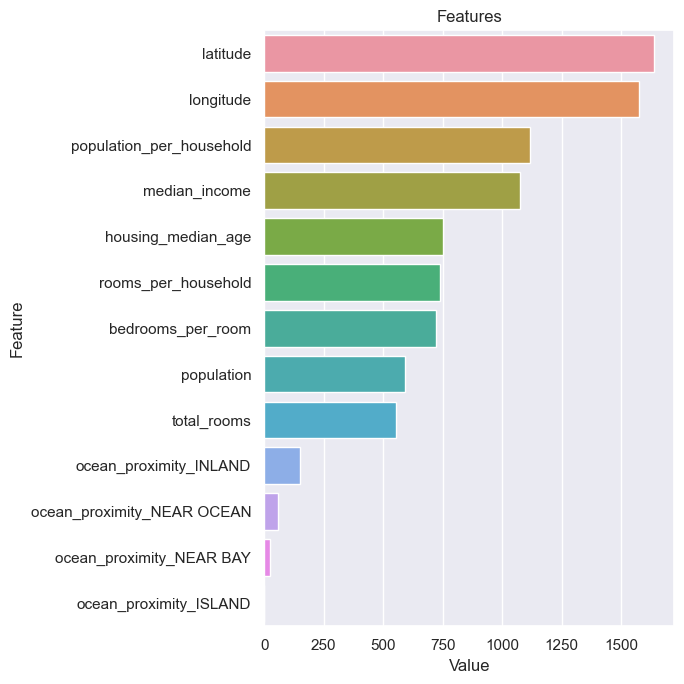

In [200]:
plot_importance(final_model, X)